In [20]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf

from sklearn.model_selection import train_test_split as tts
from sklearn.compose import make_column_transformer as mct
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import OneHotEncoder as ohe
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn

Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 13217.5029 - mae: 13217.5029 - val_loss: 13440.3516 - val_mae: 13440.3516
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13182.9180 - mae: 13182.9180 - val_loss: 13389.6221 - val_mae: 13389.6221
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13102.1328 - mae: 13102.1328 - val_loss: 13269.3711 - val_mae: 13269.3711
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12926.0459 - mae: 12926.0459 - val_loss: 13021.5615 - val_mae: 13021.5615
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12583.2500 - mae: 12583.2500 - val_loss: 12563.3975 - val_mae: 12563.3975
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11988.1104 - mae: 11988.1104 - val_loss: 11818.9912 - val_mae: 11818.9912
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11083.3672 - mae: 11083.3672 - val_loss: 107

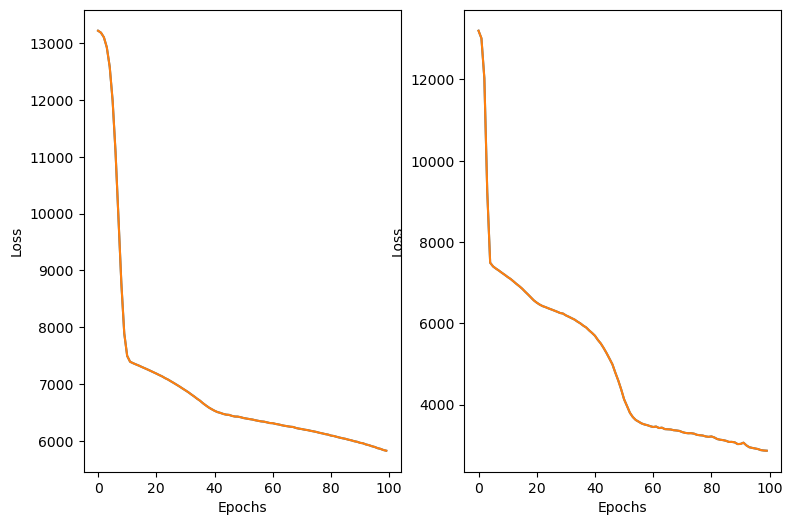

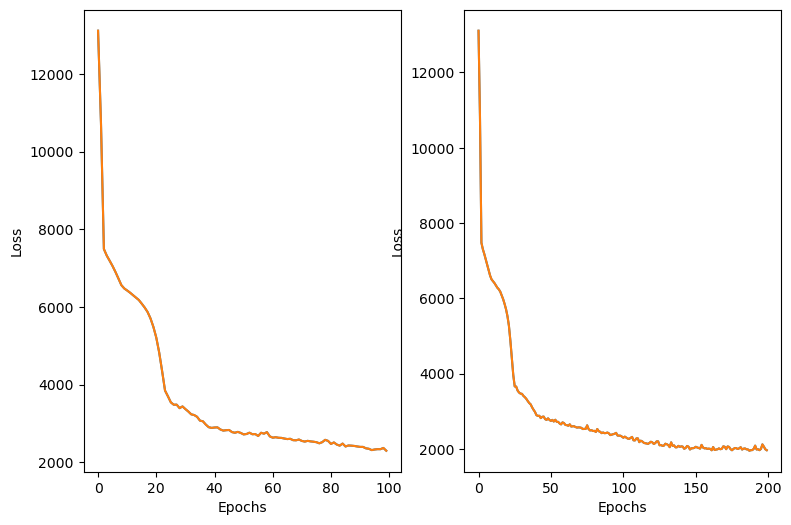

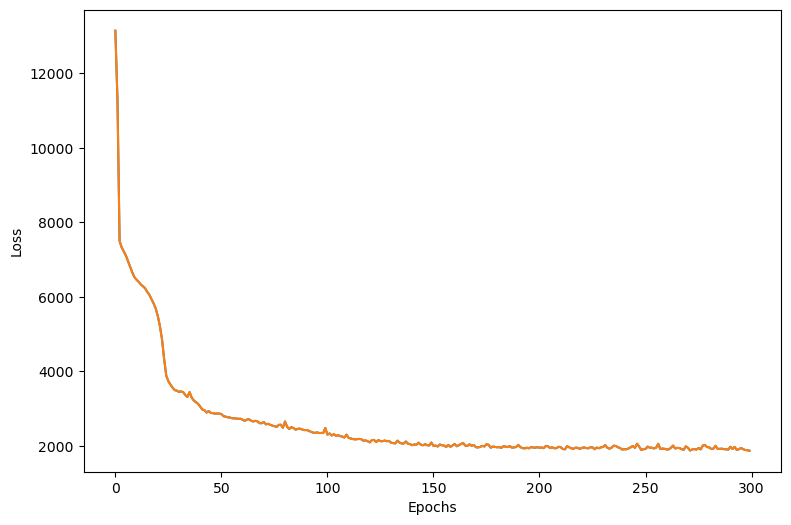

In [21]:
dat = pnd.read_csv('insurance.csv')
data = pnd.get_dummies(dat, dtype=int)
x = data.drop('charges', axis=1)
y = data['charges']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)
md1 = sql([dn(64, activation='relu', input_shape=(x.shape[1],)), dn(32, activation='relu'), dn(1)])
md1.compile(optimizer='adam', loss='mae', metrics=['mae'])
h1 = md1.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest))
#Додавання додаткового шару
md2 = sql([dn(128, activation='relu', input_shape=(x.shape[1],)), dn(64, activation='relu'), dn(32, activation='relu'), dn(1)])
md2.compile(optimizer='adam', loss='mae', metrics=['mae'])
h2 = md2.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest))
#Додавання ще одного шару
md3 = sql([dn(256, activation='relu', input_shape=(x.shape[1],)), dn(128, activation='relu'), dn(64, activation='relu'), dn(32, activation='relu'), dn(1)])
md3.compile(optimizer='adam', loss='mae', metrics=['mae'])
h3 = md3.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest))
#Збільшення кількості епох до 200
md4 = sql([dn(256, activation='relu', input_shape=(x.shape[1],)), dn(128, activation='relu'), dn(64, activation='relu'), dn(32, activation='relu'), dn(1)])
md4.compile(optimizer='adam', loss='mae', metrics=['mae'])
h4 = md4.fit(xtrain, ytrain, epochs=200, validation_data=(xtest, ytest))
#Збільшення кількості епох до 300
md5 = sql([dn(256, activation='relu', input_shape=(x.shape[1],)), dn(128, activation='relu'), dn(64, activation='relu'), dn(32, activation='relu'), dn(1)])
md5.compile(optimizer='adam', loss='mae', metrics=['mae'])
h5 = md5.fit(xtrain, ytrain, epochs=300, validation_data=(xtest, ytest))
#Оцінка
print('\n')
md1.evaluate(xtest, ytest)
md2.evaluate(xtest, ytest)
md3.evaluate(xtest, ytest)
md4.evaluate(xtest, ytest)
md5.evaluate(xtest, ytest)
#Візуалізація
ppl.figure(figsize=(9, 6))
ppl.subplot(1, 2, 1)
ppl.plot(h1.history['loss'])
ppl.plot(h1.history['mae'])
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.subplot(1, 2, 2)
ppl.plot(h2.history['loss'])
ppl.plot(h2.history['mae'])
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.show()
ppl.figure(figsize=(9, 6))
ppl.subplot(1, 2, 1)
ppl.plot(h3.history['loss'])
ppl.plot(h3.history['mae'])
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.subplot(1, 2, 2)
ppl.plot(h4.history['loss'])
ppl.plot(h4.history['mae'])
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.show()
ppl.figure(figsize=(9, 6))
ppl.plot(h5.history['loss'])
ppl.plot(h5.history['mae'])
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.show()